We are going to work with **SOFR** rate changes time series. **SOFR** (Secured Overnight Financing Rate) is the overnight reference rate announced by the FED, using the weighted median prices of overnight repo transactions collateralized by the US treasury bonds.

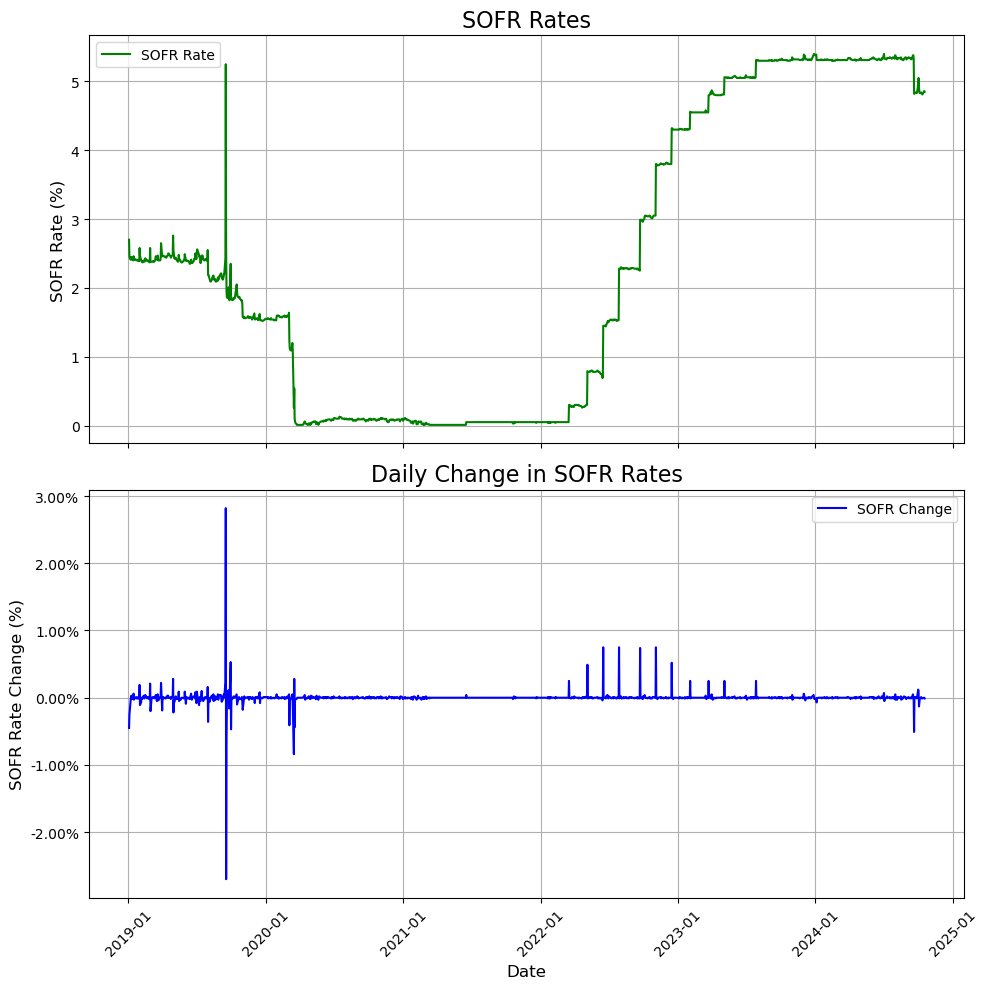

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Read the CSV file
df = pd.read_csv('./SOFR.csv')

# Clean the SOFR column and calculate changes
df['SOFR'] = df['SOFR'].replace('.', np.nan)  # Replace '.' with NaN
df['SOFR'] = pd.to_numeric(df['SOFR'], errors='coerce')  # Convert to numeric
df['SOFR_change'] = df['SOFR'].diff()  # Calculate daily SOFR rate change

# Set the date as index and drop rows with NaN values
df.set_index('Date', inplace=True)
df.dropna(inplace=True)

# Convert the index to datetime format for easier handling of date ticks
df.index = pd.to_datetime(df.index)

# Function to format the y-axis labels as percentages
def percent_formatter(x, pos):
    return f'{x:.2f}%'

# Create the figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# First plot: SOFR rates
ax1.plot(df['SOFR'], label='SOFR Rate', color='green')
ax1.set_title('SOFR Rates', fontsize=16)
ax1.set_ylabel('SOFR Rate (%)', fontsize=12)
ax1.grid(True)
ax1.legend()

# Second plot: SOFR rate changes (diff)
ax2.plot(df['SOFR_change'], label='SOFR Change', color='blue')
ax2.set_title('Daily Change in SOFR Rates', fontsize=16)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('SOFR Rate Change (%)', fontsize=12)

# Apply the percentage formatter to the y-axis for the second plot
ax2.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
ax2.grid(True)
ax2.legend()

# Set x-axis major ticks to show months and rotate for better readability
ax2.xaxis.set_major_locator(mdates.YearLocator())  # Set ticks at years
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Year-Month format
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


With this visualization, we can clearly see the Covid **ZIRP** (Zero Interest Rate Policy) regime and the US repo crisis in September 2019.

https://en.wikipedia.org/wiki/September_2019_events_in_the_U.S._repo_market